# Introduction
This notebook was created Feb 14, 2025 to compare the data we used in tableau and the data we got from the official NGEE-Arctic archives. The data in tableau were used to find the dates we used for projecting, but we projected using the other dataset. We need to compare these two data sources to determine the dates to project, and which data set we want to use for those projections. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
all_data = pd.read_csv("data/archive_tram_complete.csv")
all_data = all_data[all_data['NDVI'] != -9999]

# Comparing 2014 data

In [43]:
all_data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day_of_Month', 'Hour', 'Minute',
       'Second', 'DD_AKST', 'DD_Expected_AKST', 'Offset_time', 'DD_UTC',
       'Run_number', 'Stop_number', 'Height', 'ShortW_inc', 'ShortW_out',
       'Albedo', 'LongW_inc', 'LongW_out', 'Net_shortW', 'Net_longW',
       'Net_Rad', 'Sol_Irr_inc', 'Sol_Irr_out', 'PAR_inc', 'PAR_out', 'fPAR',
       'Red_i', 'NIR_i', 'Red_r', 'NIR_r', 'NDVI', 'T_air_C', 'T_surf_C',
       'veg_type', 'Topo_feature', 'Polygon_type', 'date', 'DOY'],
      dtype='object')

/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/2612834549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/2612834549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature_polygon"] = df["Topo_feature"].astype(str) + "_" + df["Polygon_type"].astype(str)


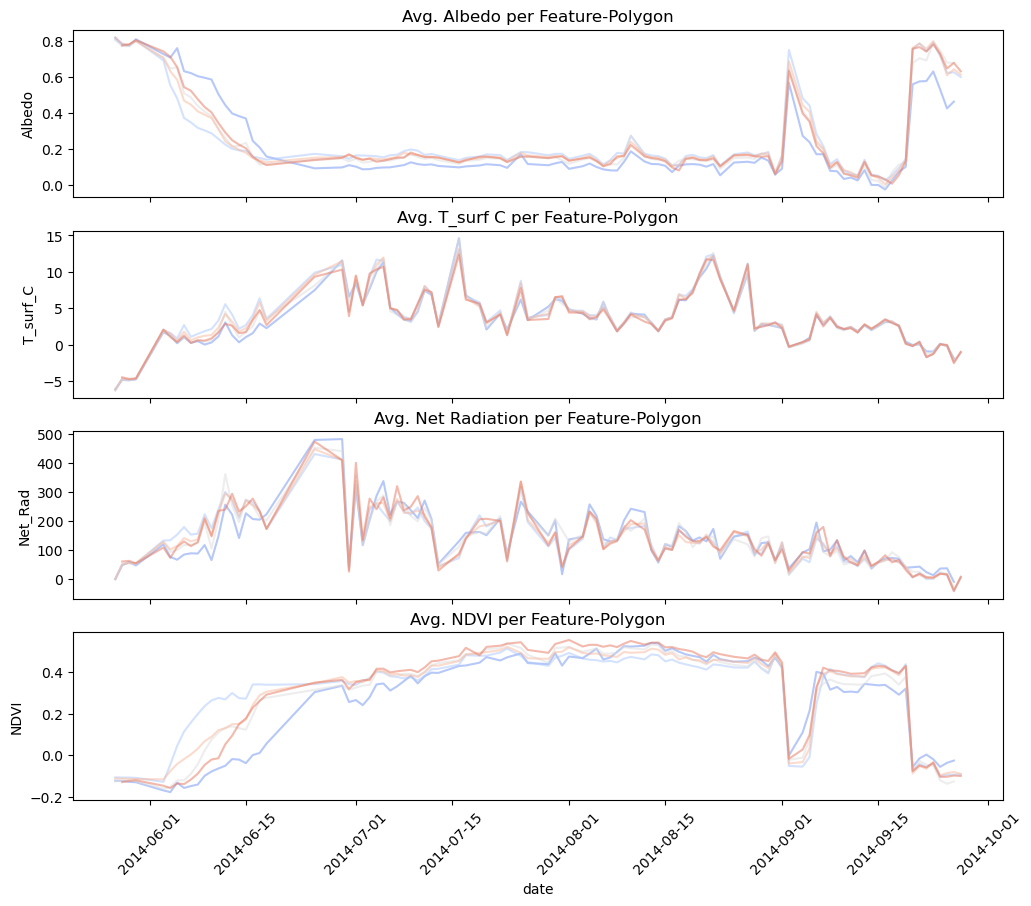

In [46]:
df = all_data[(all_data['Year'] == 2014)]
# df = all_data[(all_data['Year'] == 2014) & (all_data['Month'] < 7)& (all_data['Month'] >= 6)]

df["date"] = pd.to_datetime(df["date"])
df["feature_polygon"] = df["Topo_feature"].astype(str) + "_" + df["Polygon_type"].astype(str)

daily_avg = df.groupby(["date", "feature_polygon"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="date", y=y_variable, hue="feature_polygon", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Feature-Polygon")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Feature-Polygon")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Feature-Polygon")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Feature-Polygon")

plt.xticks(rotation=45)
# plt.tight_layout()

plt.show()


/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/1616882956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


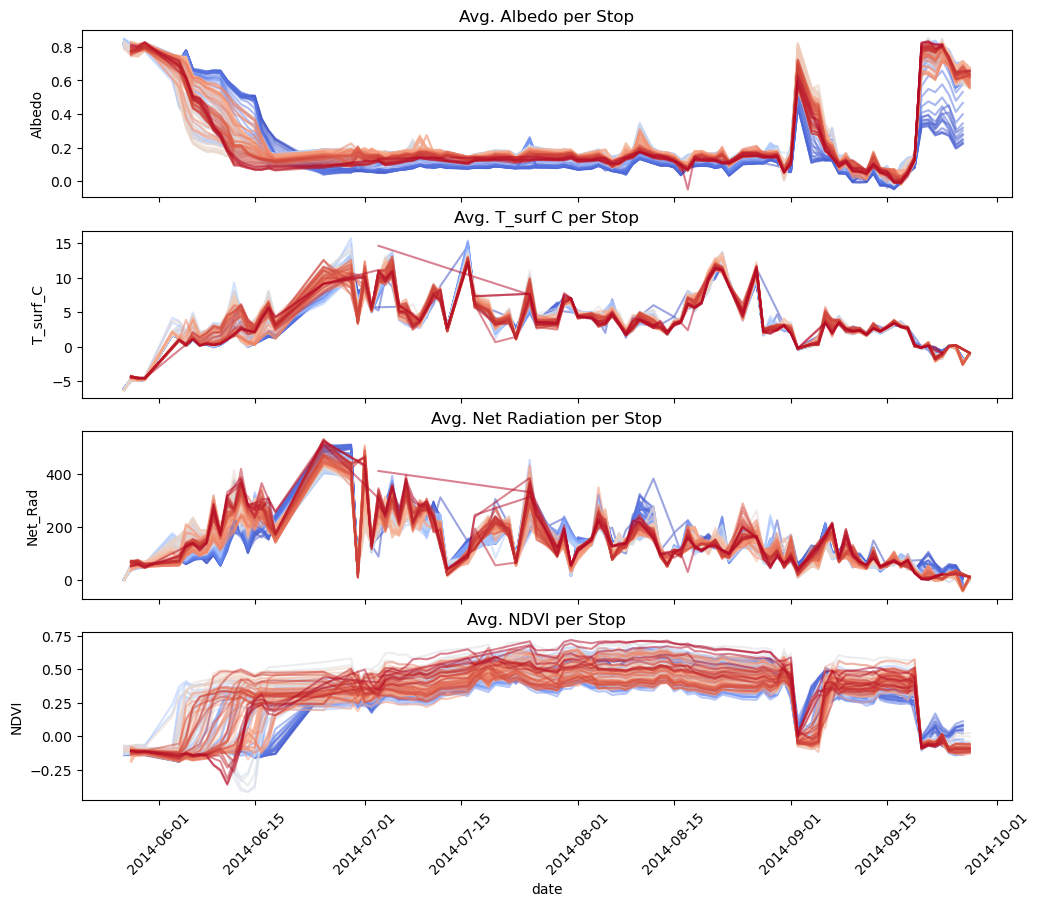

In [47]:

df = all_data[(all_data['Year'] == 2014)]
# df = all_data[(all_data['Year'] == 2014) & (all_data['Month'] < 7)& (all_data['Month'] >= 6)]

df["date"] = pd.to_datetime(df["date"])

daily_avg = df.groupby(["date", "Stop_number"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()



fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="date", y=y_variable, hue="Stop_number", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Stop")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Stop")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Stop")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Stop")

plt.xticks(rotation=45)
# plt.tight_layout()


plt.show()


In [15]:
ndvi_mean = all_data.groupby(['Year', 'Month', 'Day_of_Month'])['NDVI'].mean().reset_index()
max_ndvi_days = ndvi_mean.loc[ndvi_mean.groupby('Year')['NDVI'].idxmax()]
max_ndvi_days


Year  Month  Day_of_Month         NDVI
0   -9999  -9999         -9999 -9999.000000
42   2014      7            23     0.511858
115  2015      6            25     0.456423
288  2016      7            28     0.586993
377  2017      7            19     0.555414

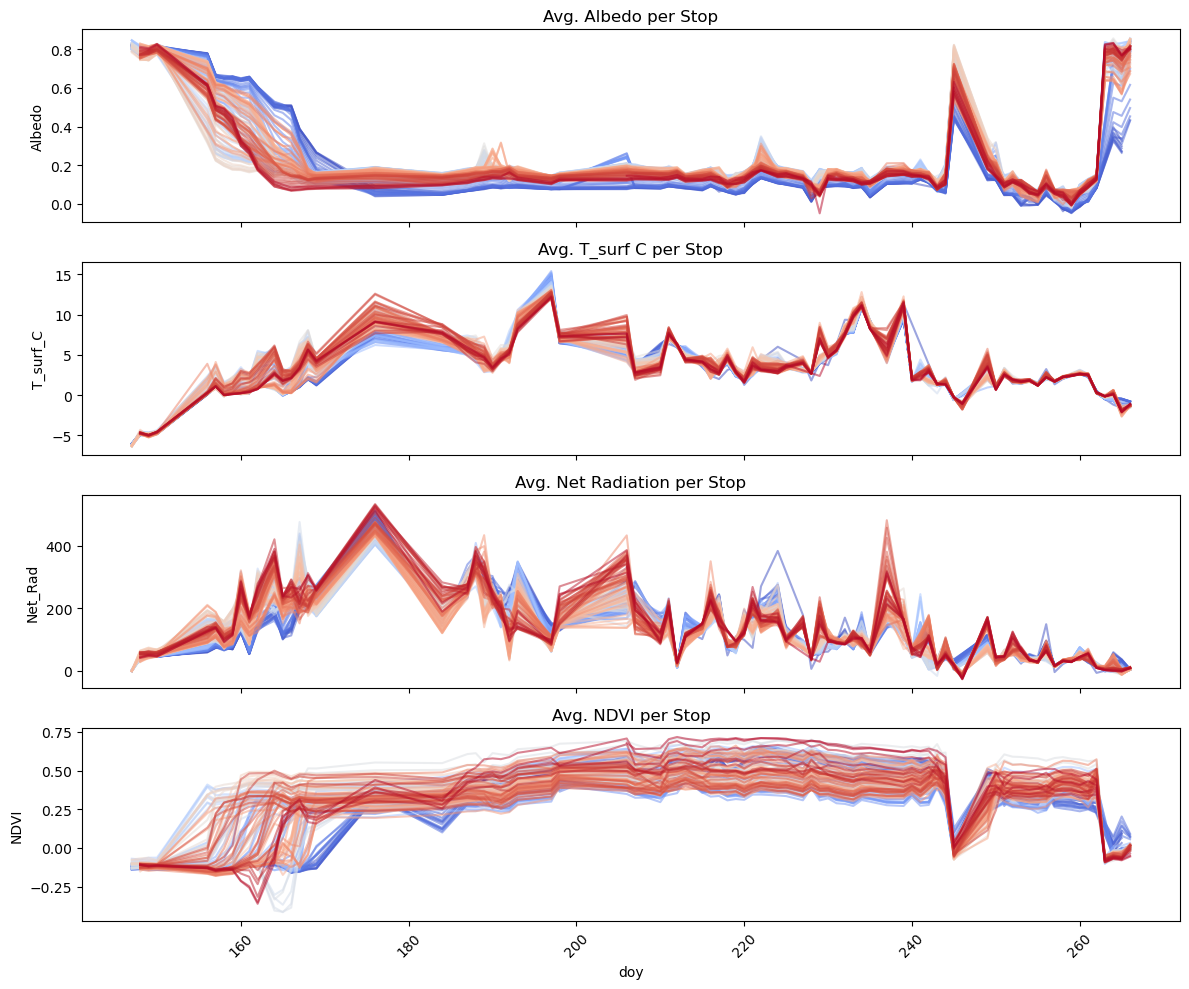

In [16]:
test_2014_data = pd.read_csv("/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/tableau/Old_tableau_plots_and_data/completeruns_fixed_2014.csv")

test_2014_data = test_2014_data[(test_2014_data['doy'] <= 275)]

daily_avg = test_2014_data.groupby(["doy", "Stop_number"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="doy", y=y_variable, hue="Stop_number", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Stop")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Stop")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Stop")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Stop")

plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [17]:
ndvi_mean = test_2014_data.groupby(['Year', 'Month', 'Day_of_Month'])['NDVI'].mean().reset_index()
max_ndvi_days = ndvi_mean.loc[ndvi_mean.groupby('Year')['NDVI'].idxmax()]
max_ndvi_days

Year  Month  Day_of_Month     NDVI
33  2014      8             1  0.51308

In [18]:
len(test_2014_data)

39843

In [19]:
all_data = all_data[all_data['NDVI'] != -9999]
all_data_2014 = all_data[all_data['Year'] == 2014]

In [20]:
aug_1_2014_tableau = test_2014_data[(test_2014_data['Month'] == 6) & (test_2014_data['Day_of_Month'] == 6)]
print(aug_1_2014_tableau.columns)

Index(['date_and_time', 'POSIX_time', 'Run_number', 'Stop_number',
       'Latitude_WGS84', 'Longitude_WGS84', 'Northing_UTM', 'Easting_UTM',
       'Height', 'DD_AKST', 'DD_Expected_AKST', 'Offset_time', 'DD_UTC',
       'ShortW_inc', 'ShortW_out', 'Albedo', 'LongW_inc', 'LongW_out',
       'Net_shortW', 'Net_longW', 'Net_Rad', 'Sol_Irr_inc', 'Sol_Irr_out',
       'PAR_inc', 'PAR_out', 'fPAR', 'Red_i', 'NIR_i', 'Red_r', 'NIR_r',
       'NDVI', 'T_air_C', 'T_surf_C', 'DateTime', 'Year', 'Month',
       'Day_of_Month', 'Hour', 'Minute', 'Second', 'doy', 'Snow_cond'],
      dtype='object')


In [21]:
aug_1_2014_complete = all_data[(all_data['Year'] == 2014) & (all_data['Month'] == 6) & (all_data['Day_of_Month'] == 6)]
print(aug_1_2014_complete.columns)

Index(['Unnamed: 0', 'Year', 'Month', 'Day_of_Month', 'Hour', 'Minute',
       'Second', 'DD_AKST', 'DD_Expected_AKST', 'Offset_time', 'DD_UTC',
       'Run_number', 'Stop_number', 'Height', 'ShortW_inc', 'ShortW_out',
       'Albedo', 'LongW_inc', 'LongW_out', 'Net_shortW', 'Net_longW',
       'Net_Rad', 'Sol_Irr_inc', 'Sol_Irr_out', 'PAR_inc', 'PAR_out', 'fPAR',
       'Red_i', 'NIR_i', 'Red_r', 'NIR_r', 'NDVI', 'T_air_C', 'T_surf_C',
       'veg_type', 'Topo_feature', 'Polygon_type', 'date', 'DOY'],
      dtype='object')


In [22]:
pd.set_option('display.max_rows', None)


In [23]:
aug_1_2014_tableau['Stop_number'].value_counts()

Stop_number
1      4
45     4
65     4
64     4
63     4
62     4
61     4
60     4
59     4
58     4
57     4
56     4
55     4
54     4
53     4
52     4
51     4
50     4
49     4
48     4
47     4
66     4
67     4
68     4
79     4
87     4
86     4
85     4
84     4
83     4
82     4
81     4
80     4
78     4
2      4
77     4
76     4
75     4
74     4
73     4
72     4
71     4
70     4
46     4
69     4
44     4
12     4
20     4
19     4
18     4
17     4
16     4
15     4
14     4
13     4
10     4
22     4
9      4
8      4
7      4
6      4
5      4
4      4
3      4
43     4
21     4
11     4
23     4
34     4
42     4
24     4
41     4
40     4
39     4
38     4
36     4
35     4
37     4
32     4
31     4
30     4
29     4
28     4
27     4
33     4
26     4
25     4
114    3
119    3
122    3
121    3
120    3
116    3
118    3
117    3
115    3
124    3
123    3
133    3
125    3
126    3
127    3
128    3
129    3
130    3
131    3
132    3
134    3
135    3
112    

In [24]:
print(len(aug_1_2014_tableau))
print(len(aug_1_2014_complete))

495
460


In [25]:
aug_1_2014_complete[['DD_AKST', 'DD_Expected_AKST', 'Offset_time', 'DD_UTC','Run_number', 'Stop_number','T_air_C', 'T_surf_C']].describe()

DD_AKST  DD_Expected_AKST  Offset_time      DD_UTC  Run_number  \
count  460.000000        460.000000   460.000000  460.000000  460.000000   
mean   157.654403        157.652083     0.055629  158.029403   25.226087   
std      0.149353          0.149470     0.020242    0.149353    0.997259   
min    157.459350        157.458330     0.024444  157.834350   24.000000   
25%    157.509990        157.506525     0.037680  157.884990   24.000000   
50%    157.625525        157.622600     0.053378  158.000525   25.000000   
75%    157.741175        157.738675     0.073093  158.116175   26.000000   
max    157.982840        157.980590     0.094200  158.357840   27.000000   

       Stop_number     T_air_C    T_surf_C  
count   460.000000  460.000000  460.000000  
mean     63.765217    0.120161    1.620211  
std      39.654297    0.536901    1.412184  
min       1.000000   -0.722000   -0.794000  
25%      29.000000   -0.485000    0.693500  
50%      60.000000    0.344000    1.618000  
75%      98.000000    0.614000    2.287500  
max     136.000000    0.855000    6.450000

In [26]:
aug_1_2014_tableau[['DD_AKST', 'DD_Expected_AKST', 'Offset_time', 'DD_UTC', 'Run_number', 'Stop_number','T_air_C', 'T_surf_C']].describe()

DD_AKST  DD_Expected_AKST  Offset_time      DD_UTC  Run_number  \
count  495.000000        495.000000   495.000000  495.000000  495.000000   
mean   157.678139        157.675781     0.056535  158.053139   25.351515   
std      0.167771          0.167796     0.020445    0.167771    1.063601   
min    157.459350        157.458330     0.024444  157.834350   24.000000   
25%    157.513850        157.510200     0.038869  157.888850   24.000000   
50%    157.633250        157.629950     0.055318  158.008250   25.000000   
75%    157.752780        157.749700     0.072127  158.127780   26.000000   
max    157.999850        157.994450     0.129509  158.374850   27.000000   

       Stop_number     T_air_C    T_surf_C  
count   495.000000  495.000000  495.000000  
mean     64.193939    0.075899    1.460549  
std      38.355396    0.541961    1.479509  
min       1.000000   -0.722000   -0.794000  
25%      31.500000   -0.502000    0.607000  
50%      62.000000    0.299000    1.592000  
75%      95.000000    0.600000    2.207500  
max     136.000000    0.855000    6.450000

In [27]:
aug_1_2014_complete[aug_1_2014_complete['Stop_number'] == 68]

Unnamed: 0  Year  Month  Day_of_Month  Hour  Minute  Second    DD_AKST  \
3218        3219  2014      6             6    11      44       1  157.48890   
3355        3356  2014      6             6    14      43      56  157.61384   
3492        3493  2014      6             6    17      43      58  157.73887   

      DD_Expected_AKST  Offset_time  ...  Red_r  NIR_r   NDVI  T_air_C  \
3218         157.48647     0.058251  ... -5.648 -8.002 -0.169    0.654   
3355         157.61147     0.056862  ... -6.729 -9.608 -0.175    0.340   
3492         157.73647     0.057418  ... -5.113 -7.593 -0.166   -0.259   

      T_surf_C  veg_type  Topo_feature  Polygon_type        date    DOY  
3218     1.497       NaN        trough           HCP  2014-06-06  157.0  
3355     1.738       NaN        trough           HCP  2014-06-06  157.0  
3492     0.777       NaN        trough           HCP  2014-06-06  157.0  

[3 rows x 39 columns]

In [28]:
aug_1_2014_tableau[aug_1_2014_tableau['Stop_number'] == 68]

date_and_time  POSIX_time  Run_number  Stop_number  \
2787  06-Jun-2014 11:44:01  1402055041          24           68   
2923  06-Jun-2014 14:43:56  1402065836          25           68   
3059  06-Jun-2014 17:43:58  1402076638          26           68   
3195  06-Jun-2014 23:44:17  1402098257          27           68   

      Latitude_WGS84  Longitude_WGS84   Northing_UTM   Easting_UTM  Height  \
2787       71.280231      -156.607961  585663.735582  7.910345e+06   1.093   
2923       71.280231      -156.607961  585663.735582  7.910345e+06   1.098   
3059       71.280231      -156.607961  585663.735582  7.910345e+06   1.104   
3195       71.280231      -156.607961  585663.735582  7.910345e+06   1.109   

        DD_AKST  ...  T_surf_C  DateTime  Year  Month  Day_of_Month  Hour  \
2787  157.48890  ...     1.497  6/6/2014  2014      6             6    11   
2923  157.61384  ...     1.738  6/6/2014  2014      6             6    14   
3059  157.73887  ...     0.777  6/6/2014  2014      6             6    17   
3195  157.98909  ...    -0.683  6/6/2014  2014      6             6    23   

      Minute  Second  doy            Snow_cond  
2787      44       1  157  Snow-covered season  
2923      43      56  157  Snow-covered season  
3059      43      58  157  Snow-covered season  
3195      44      17  157  Snow-covered season  

[4 rows x 42 columns]

In [29]:
# Find values in one dataframe that are not in the other
ndvi_diff = set(aug_1_2014_complete['NDVI']) ^ set(aug_1_2014_tableau['NDVI'])  # Symmetric difference

# Print rows where NDVI is different
# print(aug_1_2014_complete[aug_1_2014_complete['NDVI'].isin(ndvi_diff)])
print(aug_1_2014_complete[~aug_1_2014_complete['NDVI'].isin(ndvi_diff)])

# print(aug_1_2014_tableau[aug_1_2014_tableau['NDVI'].isin(ndvi_diff)])


      Unnamed: 0  Year  Month  Day_of_Month  Hour  Minute  Second    DD_AKST  \
3151        3152  2014      6             6    11       1      28  157.45935   
3152        3153  2014      6             6    11       2       6  157.45979   
3153        3154  2014      6             6    11       2      43  157.46022   
3154        3155  2014      6             6    11       3      21  157.46066   
3155        3156  2014      6             6    11       3      59  157.46110   
3156        3157  2014      6             6    11       4      37  157.46154   
3157        3158  2014      6             6    11       5      15  157.46198   
3158        3159  2014      6             6    11       5      53  157.46242   
3159        3160  2014      6             6    11       6      31  157.46286   
3160        3161  2014      6             6    11       7       9  157.46330   
3161        3162  2014      6             6    11       7      47  157.46374   
3162        3163  2014      6           

# Comparing 2015 data

/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/500738220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/500738220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature_polygon"] = df["Topo_feature"].astype(str) + "_" + df["Polygon_type"].astype(str)


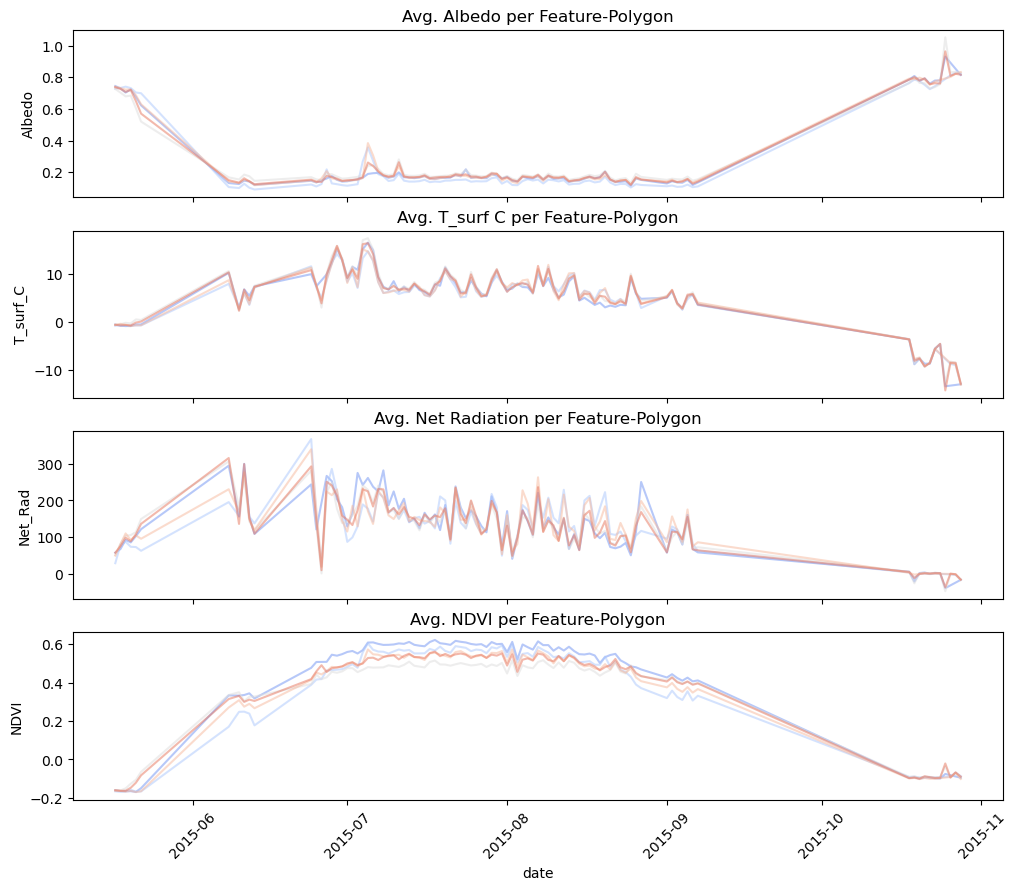

In [48]:
df = all_data[(all_data['Year'] == 2015)]

df["date"] = pd.to_datetime(df["date"])
df["feature_polygon"] = df["Topo_feature"].astype(str) + "_" + df["Polygon_type"].astype(str)

daily_avg = df.groupby(["date", "feature_polygon"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="date", y=y_variable, hue="feature_polygon", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Feature-Polygon")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Feature-Polygon")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Feature-Polygon")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Feature-Polygon")

plt.xticks(rotation=45)
# plt.tight_layout()

plt.show()


/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/972010800.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


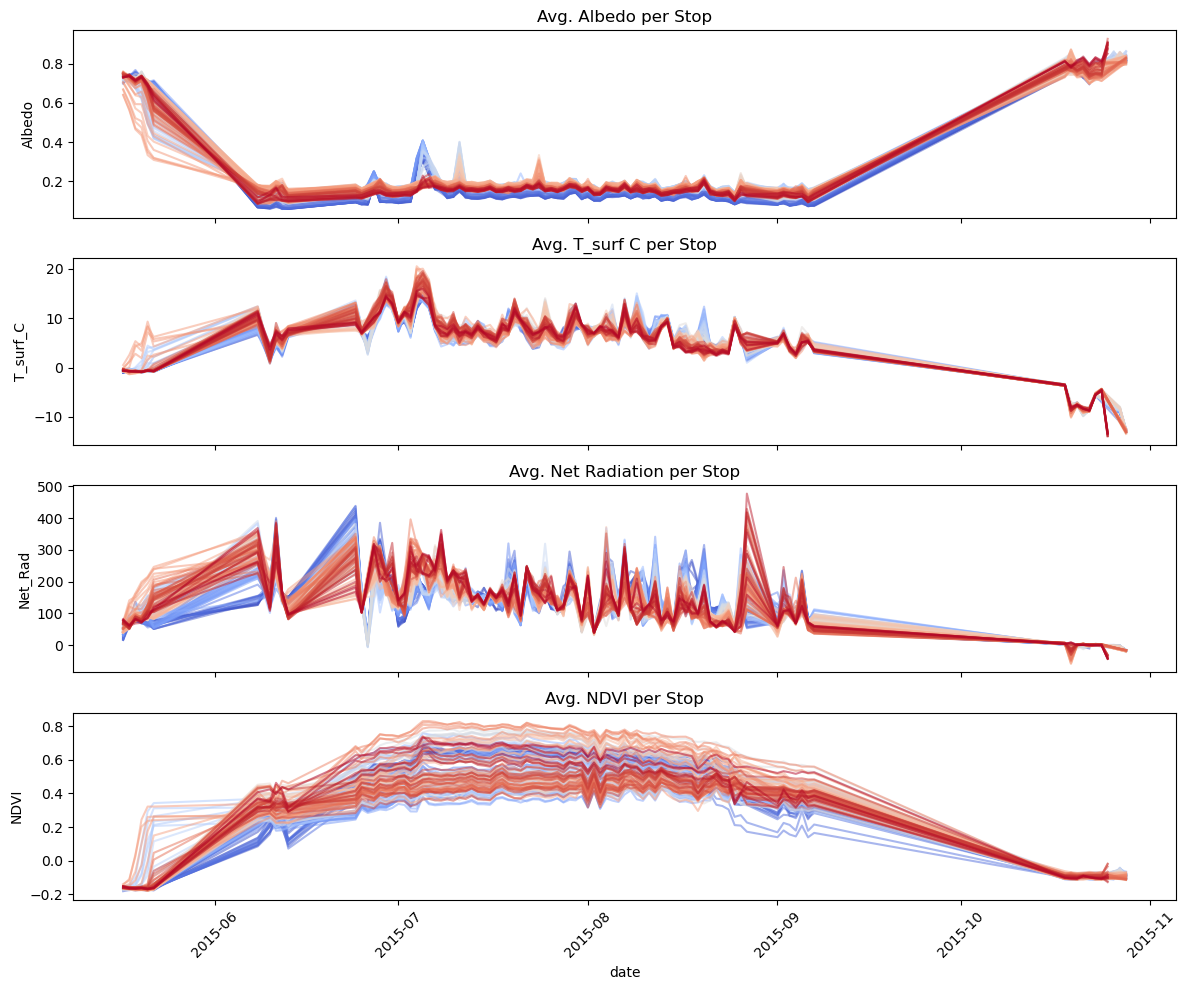

In [30]:
all_data = pd.read_csv("data/tram_complete.csv")
all_data = all_data[all_data['NDVI'] != -9999]


# df = all_data[(all_data['Year'] == 2015) & (all_data['Month'] < 7)& (all_data['Month'] >= 6)]
df = all_data[(all_data['Year'] == 2015)]

df["date"] = pd.to_datetime(df["date"])

daily_avg = df.groupby(["date", "Stop_number"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()



fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="date", y=y_variable, hue="Stop_number", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Stop")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Stop")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Stop")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Stop")

plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [31]:
ndvi_mean = df.groupby(['Year', 'Month', 'Day_of_Month'])['NDVI'].mean().reset_index()
max_ndvi_days = ndvi_mean.loc[ndvi_mean.groupby('Year')['NDVI'].idxmax()]
max_ndvi_days


KeyError: 'Day_of_Month'

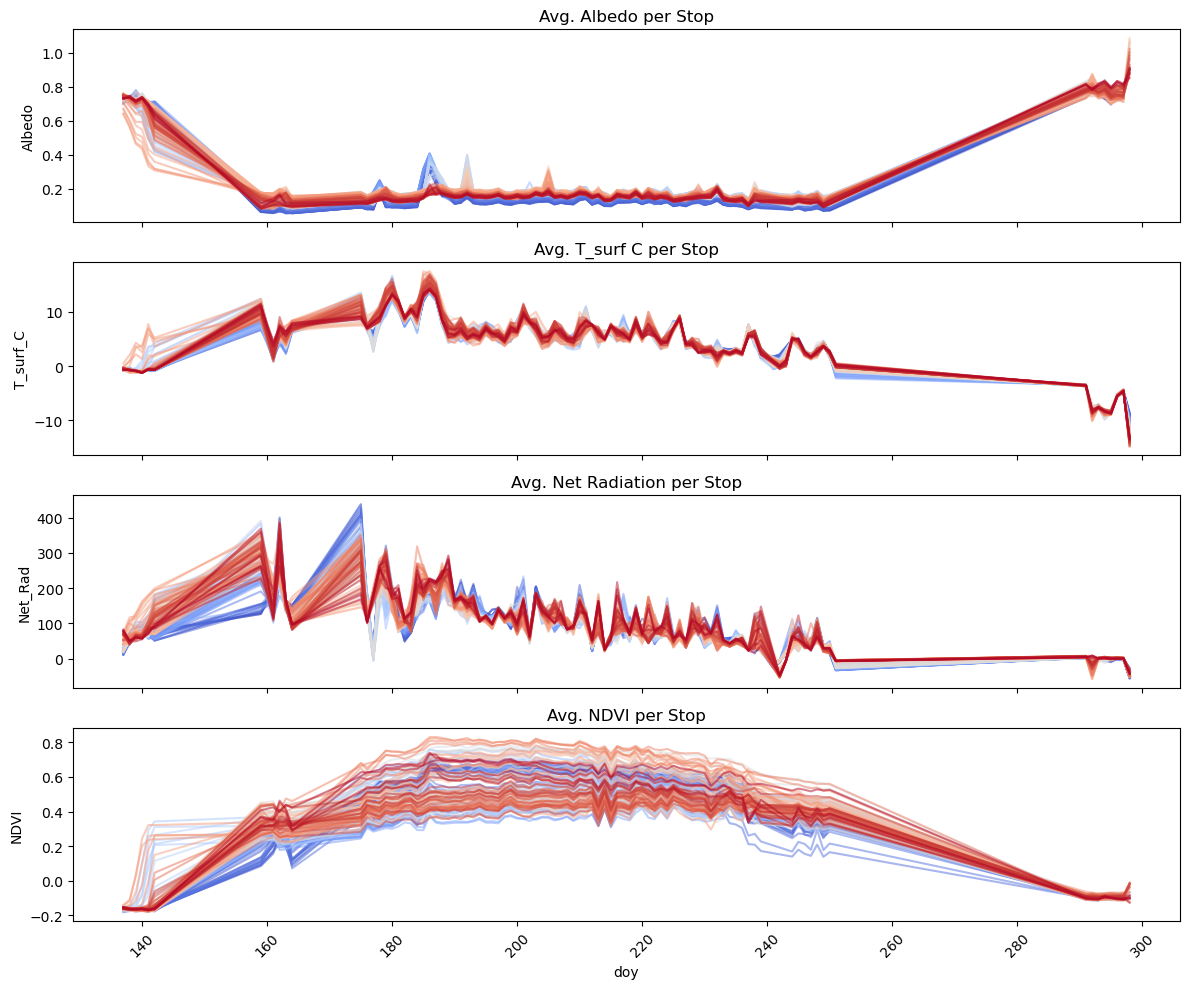

In [32]:


test_2015_data = pd.read_csv("/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/tableau/Old_tableau_plots_and_data/completeruns_fixed_2015.csv")

# test_2015_data = test_2015_data[(test_2015_data['doy'] <= 181) & (test_2015_data['doy'] >= 153)]

daily_avg = test_2015_data.groupby(["doy", "Stop_number"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="doy", y=y_variable, hue="Stop_number", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Stop")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Stop")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Stop")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Stop")

plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [33]:
ndvi_mean = test_2015_data.groupby(['Year', 'Month', 'Day_of_Month'])['NDVI'].mean().reset_index()
max_ndvi_days = ndvi_mean.loc[ndvi_mean.groupby('Year')['NDVI'].idxmax()]
max_ndvi_days


Year  Month  Day_of_Month      NDVI
50  2015      8             2  0.567198

# Comparing 2016

/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/3334829794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/3334829794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature_polygon"] = df["Topo_feature"].astype(str) + "_" + df["Polygon_type"].astype(str)


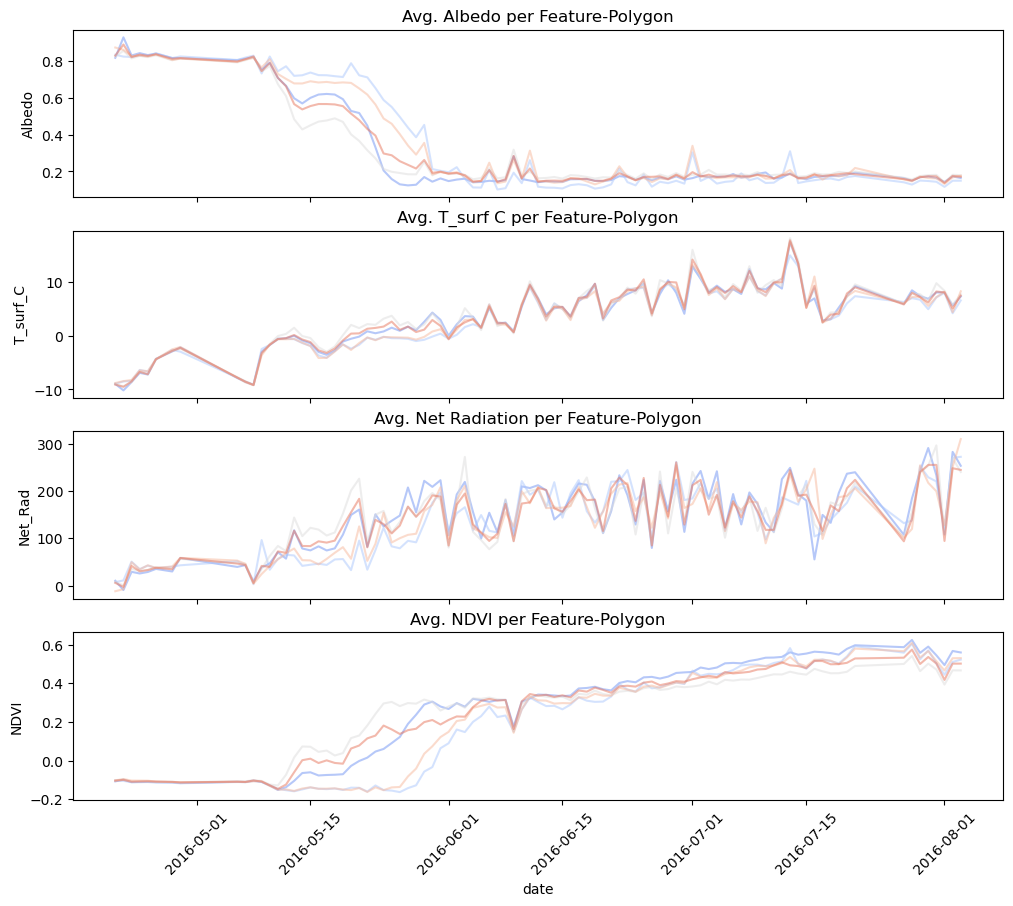

In [49]:
df = all_data[(all_data['Year'] == 2016)]

df["date"] = pd.to_datetime(df["date"])
df["feature_polygon"] = df["Topo_feature"].astype(str) + "_" + df["Polygon_type"].astype(str)

daily_avg = df.groupby(["date", "feature_polygon"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="date", y=y_variable, hue="feature_polygon", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Feature-Polygon")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Feature-Polygon")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Feature-Polygon")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Feature-Polygon")

plt.xticks(rotation=45)
# plt.tight_layout()

plt.show()


/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/3966200795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


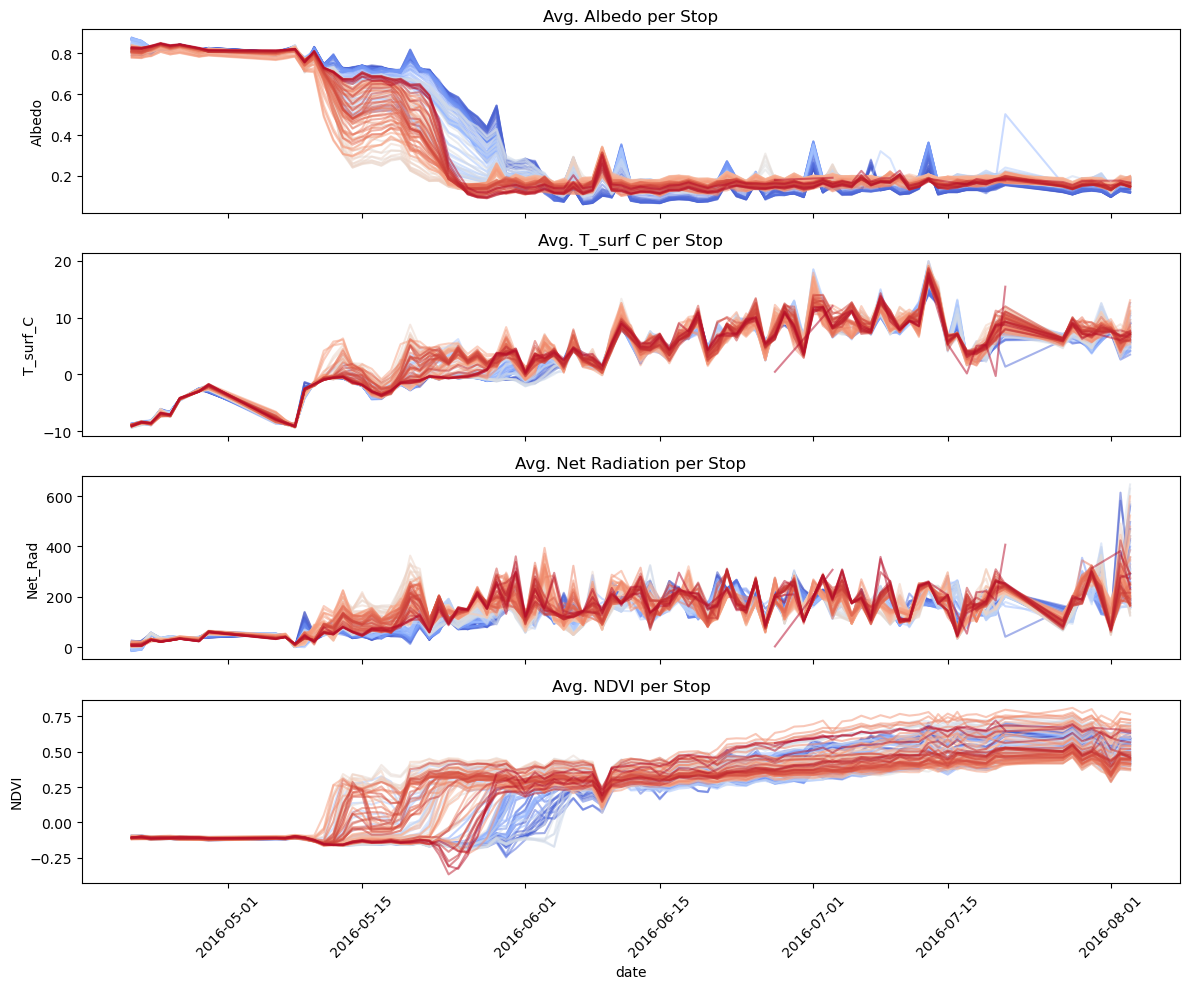

In [34]:
all_data = pd.read_csv("data/tram_complete.csv")
all_data = all_data[all_data['NDVI'] != -9999]


# df = all_data[(all_data['Year'] == 2015) & (all_data['Month'] < 7)& (all_data['Month'] >= 6)]
df = all_data[(all_data['Year'] == 2016)]

df["date"] = pd.to_datetime(df["date"])

daily_avg = df.groupby(["date", "Stop_number"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()



fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="date", y=y_variable, hue="Stop_number", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Stop")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Stop")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Stop")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Stop")

plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [35]:
ndvi_mean = df.groupby(['Year', 'Month', 'Day_of_Month'])['NDVI'].mean().reset_index()
max_ndvi_days = ndvi_mean.loc[ndvi_mean.groupby('Year')['NDVI'].idxmax()]
max_ndvi_days


KeyError: 'Day_of_Month'

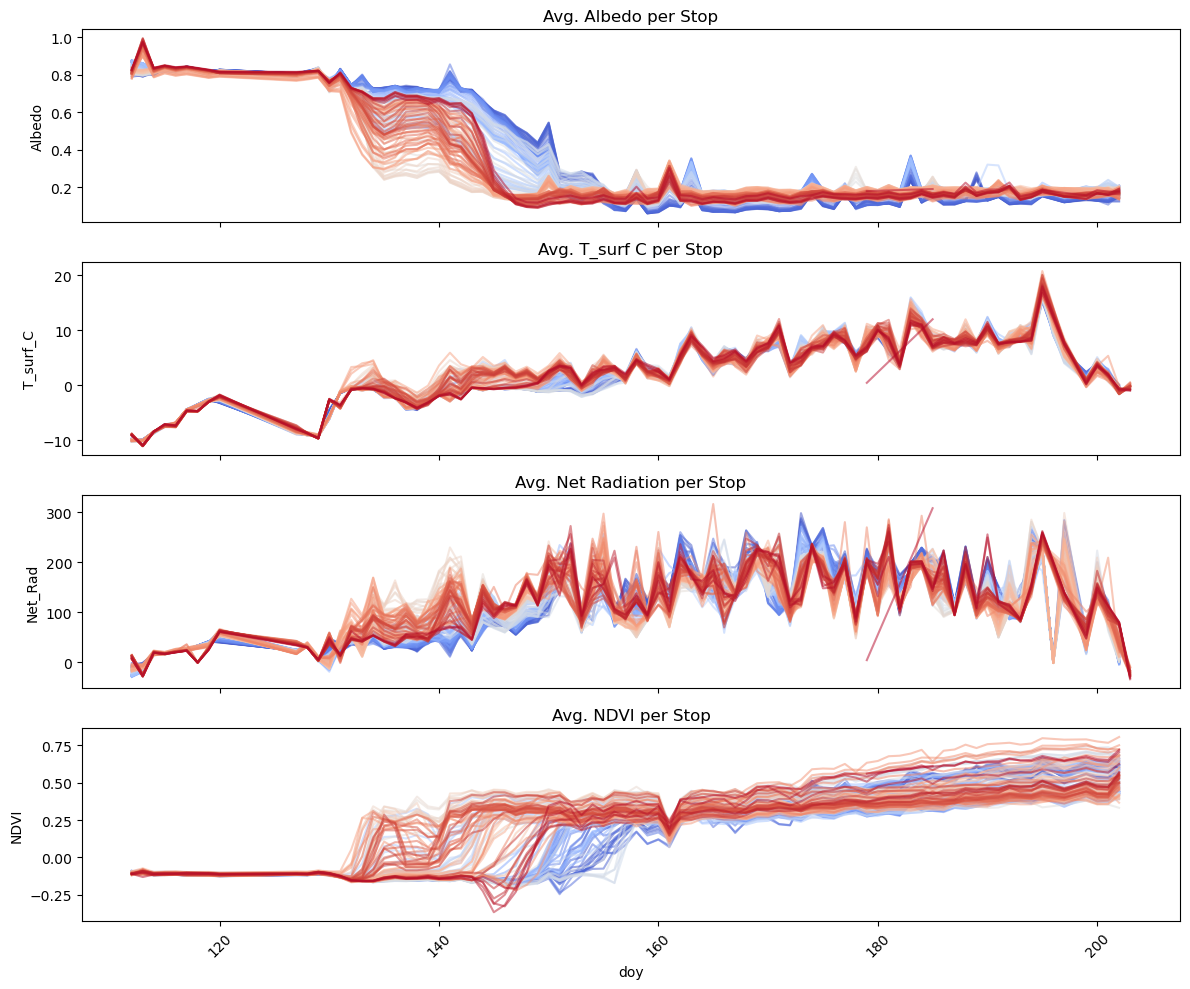

In [ ]:


test_2016_data = pd.read_csv("/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/tableau/Old_tableau_plots_and_data/completeruns_fixed_2016.csv")

# test_2015_data = test_2015_data[(test_2015_data['doy'] <= 181) & (test_2015_data['doy'] >= 153)]

daily_avg = test_2016_data.groupby(["doy", "Stop_number"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="doy", y=y_variable, hue="Stop_number", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Stop")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Stop")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Stop")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Stop")

plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [ ]:
ndvi_mean = test_2016_data.groupby(['Year', 'Month', 'Day_of_Month'])['NDVI'].mean().reset_index()
max_ndvi_days = ndvi_mean.loc[ndvi_mean.groupby('Year')['NDVI'].idxmax()]
max_ndvi_days


Year  Month  Day_of_Month      NDVI
83  2016      7            20  0.528077

# Comparing 2017

/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/3574707267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/3574707267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature_polygon"] = df["Topo_feature"].astype(str) + "_" + df["Polygon_type"].astype(str)


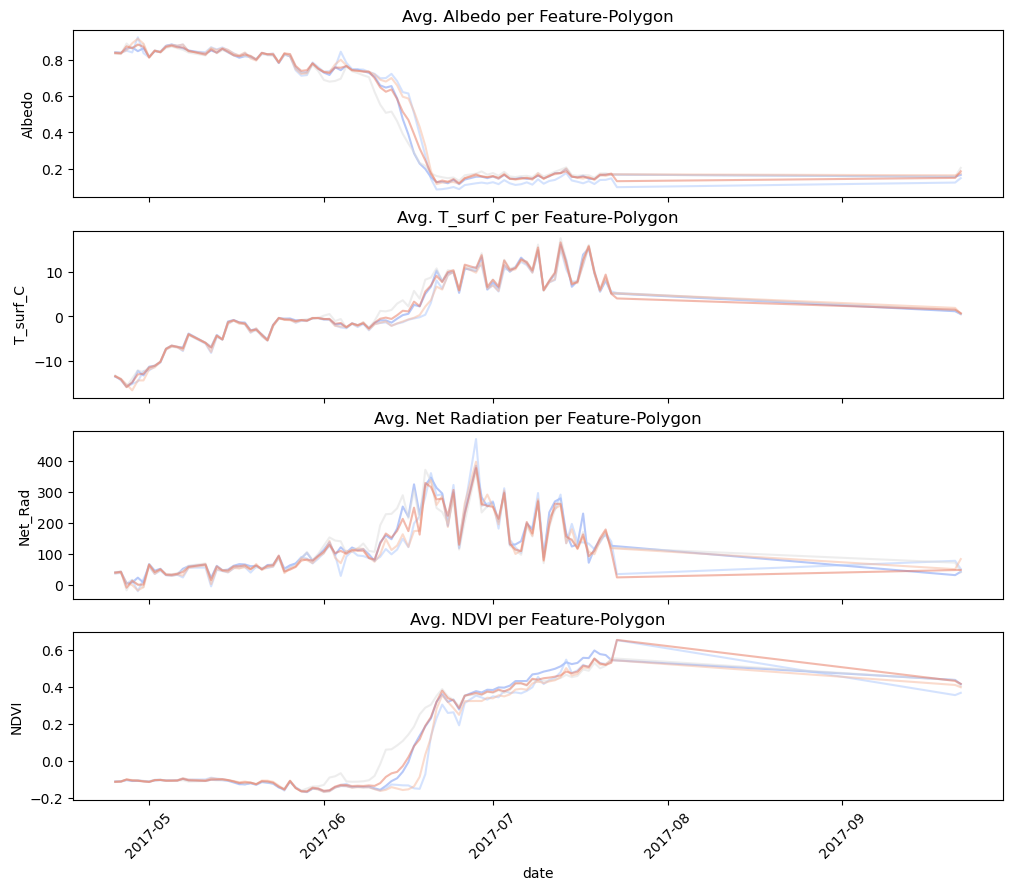

In [51]:
all_data = all_data[all_data['NDVI'] != -9999]
all_data = all_data[all_data['Albedo'] != -9999]
df = all_data[(all_data['Year'] == 2017)]

df["date"] = pd.to_datetime(df["date"])
df["feature_polygon"] = df["Topo_feature"].astype(str) + "_" + df["Polygon_type"].astype(str)

daily_avg = df.groupby(["date", "feature_polygon"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="date", y=y_variable, hue="feature_polygon", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Feature-Polygon")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Feature-Polygon")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Feature-Polygon")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Feature-Polygon")

plt.xticks(rotation=45)
# plt.tight_layout()

plt.show()


/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_60867/3797045484.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


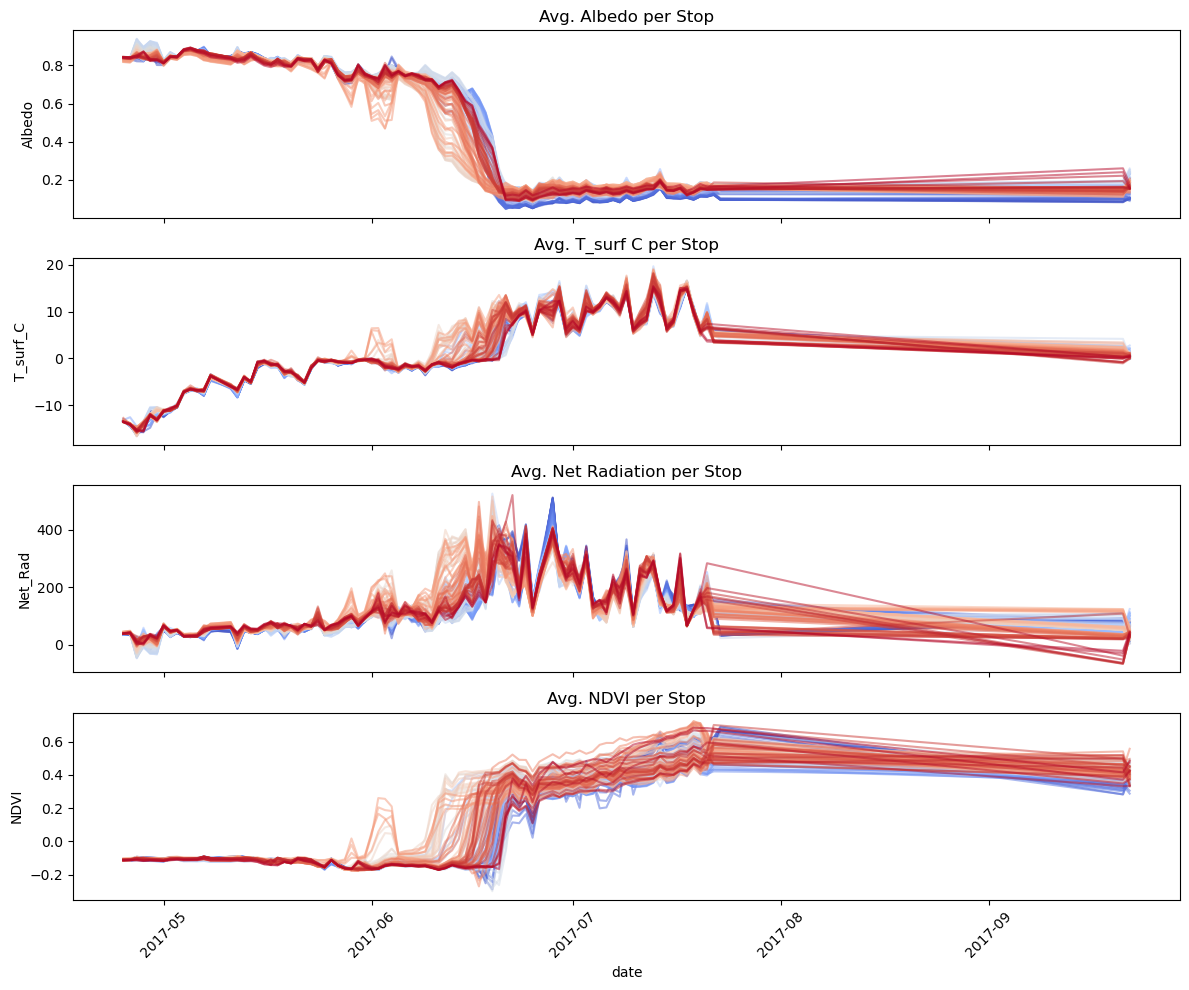

In [36]:
all_data = pd.read_csv("data/tram_complete.csv")
all_data = all_data[all_data['NDVI'] != -9999]
all_data = all_data[all_data['Albedo'] != -9999]


# df = all_data[(all_data['Year'] == 2015) & (all_data['Month'] < 7)& (all_data['Month'] >= 6)]
df = all_data[(all_data['Year'] == 2017)]

df["date"] = pd.to_datetime(df["date"])

daily_avg = df.groupby(["date", "Stop_number"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()



fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="date", y=y_variable, hue="Stop_number", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Stop")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Stop")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Stop")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Stop")

plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [38]:
# ndvi_mean = df.groupby(['Year', 'Month', 'Day_of_Month'])['NDVI'].mean().reset_index()
# max_ndvi_days = ndvi_mean.loc[ndvi_mean.groupby('Year')['NDVI'].idxmax()]
# max_ndvi_days


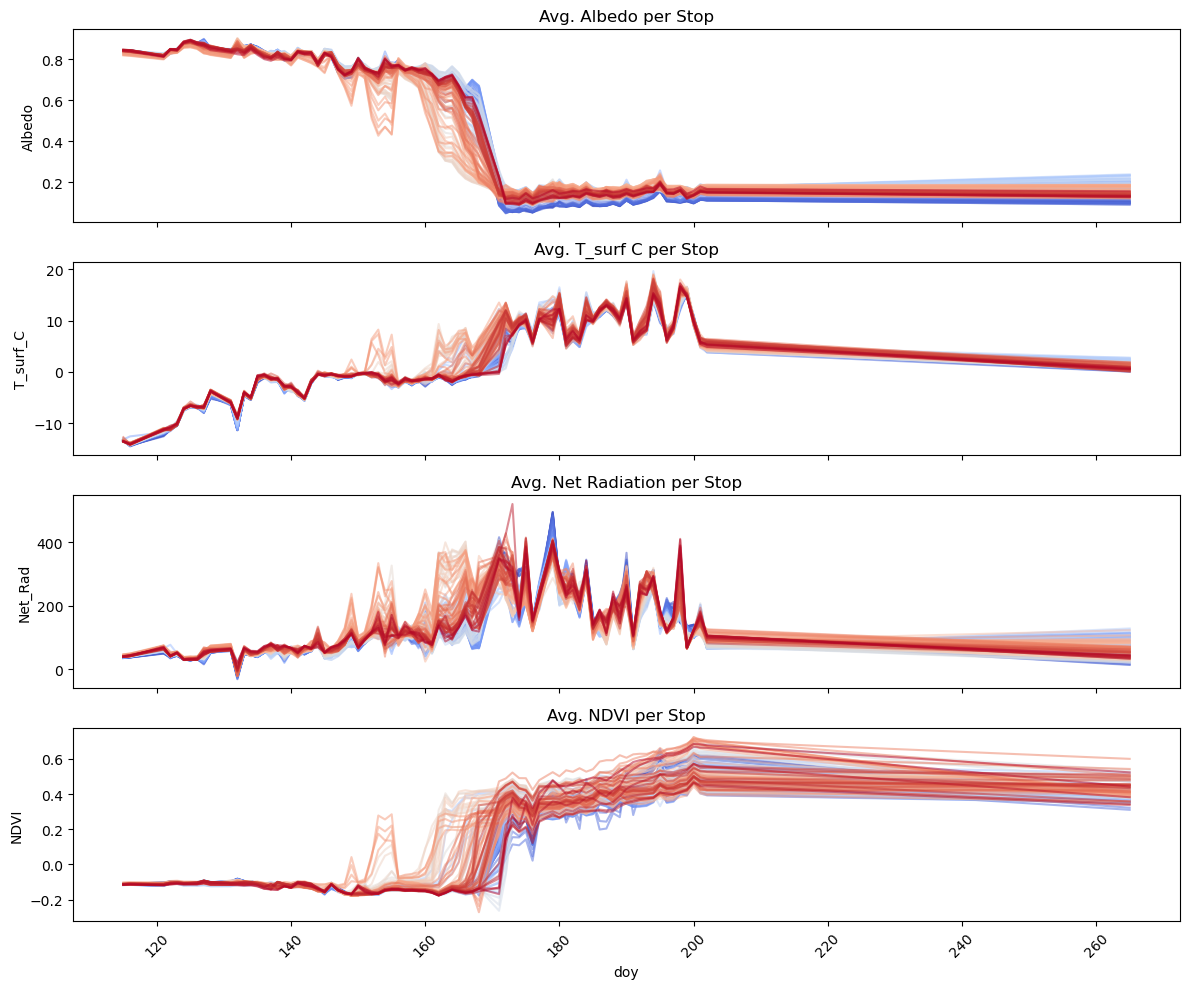

In [39]:


test_2017_data = pd.read_csv("/Users/colettebrown/Library/CloudStorage/GoogleDrive-coletteb@berkeley.edu/Shared drives/Tram/tableau/Old_tableau_plots_and_data/completeruns_fixed_2017.csv")

# test_2015_data = test_2015_data[(test_2015_data['doy'] <= 181) & (test_2015_data['doy'] >= 153)]

daily_avg = test_2017_data.groupby(["doy", "Stop_number"]).agg({
    "Albedo": "mean",
    "T_surf_C": "mean",
    "Net_Rad": "mean",
    "NDVI": "mean"
}).reset_index()


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

def plot_variable(ax, y_variable, color, title):
    sns.lineplot(ax=ax, data=daily_avg, x="doy", y=y_variable, hue="Stop_number", palette="coolwarm", alpha=0.5)
    ax.set_title(title)
    ax.legend([],[], frameon=False)  

plot_variable(axes[0], "Albedo", "blue", "Avg. Albedo per Stop")
plot_variable(axes[1], "T_surf_C", "red", "Avg. T_surf C per Stop")
plot_variable(axes[2], "Net_Rad", "green", "Avg. Net Radiation per Stop")
plot_variable(axes[3], "NDVI", "blue", "Avg. NDVI per Stop")

plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [40]:
ndvi_mean = test_2017_data.groupby(['Year', 'Month', 'Day_of_Month'])['NDVI'].mean().reset_index()
max_ndvi_days = ndvi_mean.loc[ndvi_mean.groupby('Year')['NDVI'].idxmax()]
max_ndvi_days


Year  Month  Day_of_Month      NDVI
76  2017      7            19  0.555414